In [84]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [85]:
# Ex 1

In [86]:
A = np.array([[25., 15., -5.],
              [15., 18., 0.],
              [-5., 0., 11.]])
b = np.array([[1],
              [2],
              [3]])

In [87]:
# a)

def cholesky(A, eps=1e-15):
    n = A.shape[0]
    
    # verificam ca A sa fie simetrica
    if (A != A.T).any():
        print("Conditiile nu sunt indeplinite")
        return None
    # aplicam criteriul lui Sylvester pentru a verifica daca e pozitiv definita
    for k in range(n):
        delta = np.linalg.det(A[:k,:k])
        if abs(delta) < eps:
            print("Conditiile nu sunt indeplinite")
            return None
    
    L = np.zeros((n,n))
    for k in range(n):
        L[k,k] = sqrt(A[k,k] - sum(L[k,:k] ** 2))
        for i in range(k+1, n):
            L[i,k] = (A[i,k] - L[i,:k]@L[k,:k]) / L[k,k]
            
    return L

In [67]:
L = cholesky(A)
print(L)
print(L@L.T)  # verificare

[[ 5.  0.  0.]
 [ 3.  3.  0.]
 [-1.  1.  3.]]
[[25. 15. -5.]
 [15. 18.  0.]
 [-5.  0. 11.]]


In [88]:
# b)

n = 3
y = np.zeros((n,1))
x = np.zeros((n,1))

# Pentru a calcula y rezolvam sistemul L@y = b
# Folosim substitutia ascendenta pentru ca L este triungiular superioara
for i in range(n):
    y[i,0] = (b[i] - L[i,:i]@y[:i]) / L[i,i]

# Pentru a calcula y rezolvam sistemul L.T@x = y
# Folosim substitutia descendenta pentru ca L.T este triungiular inferioara
for i in range(n - 1, -1, -1):
    x[i,0] = (y[i] - L.T[i,i+1:]@x[i+1:]) / L.T[i,i]

print(x)

[[0.06814815]
 [0.05432099]
 [0.3037037 ]]


In [98]:
print(A@x) # verificare

[[1.]
 [2.]
 [3.]]


In [90]:
# Ex 2

In [91]:
def f(x):
    return x ** 3 + 8 * x ** 2 - 13 * x - 140

def df(x):
    return 3 * x ** 2 + 16 * x - 13

def ddf(x):
    return 6 * x + 16

eps = 1e-3

In [92]:
def newton_raphson(f, df, x0, epsilon):
    x_aprox = x0 - (f(x0) / df(x0))
    N = 1
    while abs(x_aprox - x0) / abs(x0) >= epsilon:
        x0 = x_aprox
        x_aprox = x0 - (f(x0) / df(x0))
        N += 1
    return x_aprox, N

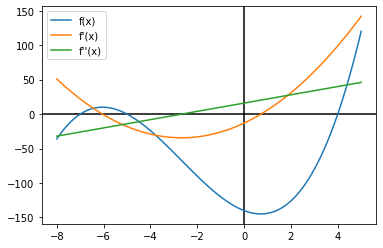

In [93]:
x_gr = np.linspace(-8, 5, 100)
y = f(x_gr)
dy = df(x_gr)
ddy = ddf(x_gr)

plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX

plt.plot(x_gr, y, label="f(x)")
plt.plot(x_gr, dy, label="f'(x)")
plt.plot(x_gr, ddy, label="f''(x)")

plt.legend()
plt.show()

In [94]:
# f'(x) se anuleaza in -6 si in intervalul (0, 1)
# f''(x) se anuleaza in -16 / 6 = -2.(6)

# trebuie sa alegem intervale [a,b] in care f' si f'' nu se anuleaza
# iar f(a) * f(b) < 0
# in interval alegem x0 astfel incat f(x) * f''(x) > 0

# putem alege intervalele [-8, -6.1], [-5.9, -2.7], [1, 6]
# pentru acestea alegem x0 = -8, -3, respectiv 2

In [95]:
print(newton_raphson(f, df, -8, eps))
print(newton_raphson(f, df, -3, eps))
print(newton_raphson(f, df, 2, eps))

(-7.000000454515764, 4)
(-4.999999920376763, 4)
(4.000000045108168, 5)


In [96]:
# solutiile sunt -7, -5, 4
# verificam

print(f(-7))
print(f(-5))
print(f(4))

0
0
0


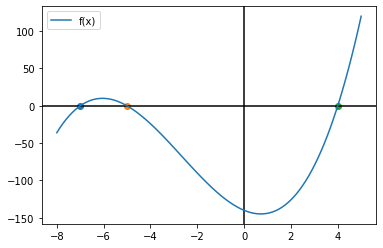

In [99]:
#adaugam punctele pe grafic

plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX

plt.plot(x_gr, y, label="f(x)")
plt.scatter(-7, f(-7))
plt.scatter(-5, f(-5))
plt.scatter(4, f(4))

plt.legend()
plt.show()